In [ ]:
import networkx as nx
from networkx.algorithms import bipartite
import numpy as np
import csv
import matplotlib.pyplot as plt

**Q 1**

In [ ]:
with open("nutrients1.csv") as infile:
  csv_reader = csv.reader(infile)
  G = nx.Graph(csv_reader)

In [ ]:
# Relabel nodes - capitalize all the node names nx.relabel_nodes() title method does this
# first let us do the mapping
mapping = {node: node.title() for node in G if isinstance (node,str)}
# relabel
nx.relabel_nodes(G,mapping, copy=False)

In [ ]:
# In the nutrients file we have two type of nodes foods and nutrients. Labelling them for future analysis.
nutrients = set(('A', 'Cu', 'B6', 'D', 'Riboflavin', 'Ca', 'C', 'Se', 'Mn','Thiamin', 'Zn', 'Niacin', 'E', 'B12', 'Folates'))
foods = set(('Carrots', 'Eggs', 'Fatty Fish', 'Green Leafy Vegs', 'Liver', 'Milk', 'Tomatoes', 'Asparagus', 'Beans', 'Kidneys', 'Potatoes', 'Pumpkins', 'Broccoli', 'Cheese', 'Nuts', 'Whole Grains', 'Mushrooms', 'Seeds', 'Legumes', 'Wheat', 'Beef', 'Spinach', 'Poultry', 'Shellfish', 'Veg Oils', 'Yogurt'))

In [ ]:
nutrient_dict = {node: (node in nutrients) for node in G}
# nx.set_node_attributes(G, "nutrient", nutrient_dict)
nx.set_node_attributes(G, name = 'nutrient', values = nutrient_dict)
#print(G.nodes(data = True))

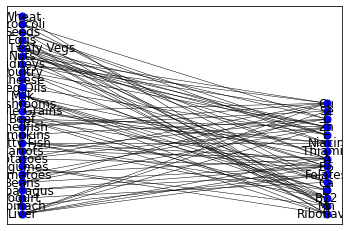

In [ ]:
#Creating bipartite graph

edges = G.edges(data=True)

Bip = nx.Graph()
Bip.add_nodes_from(list(foods), bipartite=0)
Bip.add_nodes_from(list(nutrients), bipartite=1)
Bip.add_edges_from(edges)

plt.figure()
edges = Bip.edges()
pos = dict()
pos.update( (n, (1, i)) for i, n in enumerate(foods) )
pos.update( (n, (2, i)) for i, n in enumerate(nutrients) )
nx.draw_networkx(Bip, pos=pos, edgelist=edges, node_size=50, node_color='blue', width = 0.5)
plt.show()

In [ ]:
wbg_foods =  bipartite.weighted_projected_graph(Bip, foods)

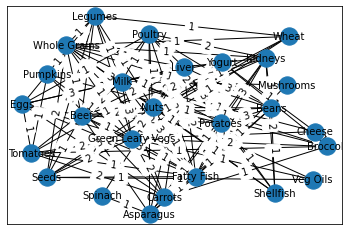

In [ ]:
layout = nx.spring_layout(wbg_foods, k=1,iterations=10)
nx.draw_networkx(wbg_foods, layout, font_size=10)
nx.draw_networkx_edge_labels(wbg_foods, edge_labels=nx.get_edge_attributes(wbg_foods,'weight'), pos=layout)
plt.show()

In [ ]:
wbg_nutrients =  bipartite.weighted_projected_graph(Bip, nutrients)

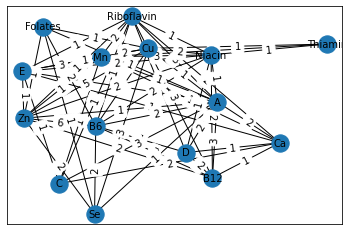

In [ ]:
layout = nx.spring_layout(wbg_nutrients, k=1,iterations=10)
nx.draw_networkx(wbg_nutrients, layout, font_size=10)
nx.draw_networkx_edge_labels(wbg_nutrients, edge_labels=nx.get_edge_attributes(wbg_nutrients,'weight'), pos=layout)
plt.show()

**Q 2**

In [ ]:
with open("directed.csv") as infile:
  csv_reader = csv.reader(infile)
  G = nx.DiGraph(csv_reader)

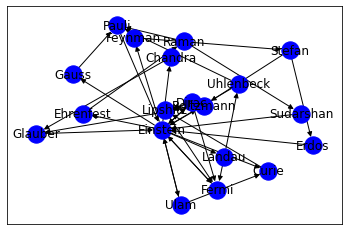

In [ ]:
pos=nx.spring_layout(G, k=0.5, iterations=20) 
nx.draw_networkx(G, pos, node_color='blue')

False
True


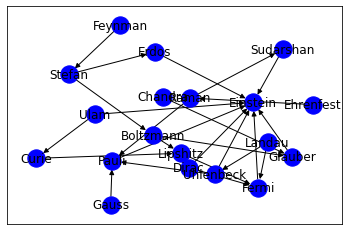

In [ ]:
while nx.is_directed_acyclic_graph(G)!=True :
   cycle_edges=nx.find_cycle(G)
   remove_edge=cycle_edges[0]
   G.remove_edge(*remove_edge)

pos=nx.spring_layout(G, k=0.5, iterations=20) 
nx.draw_networkx(G, pos, node_color='blue')

In [ ]:
Adj_mat = nx.adjacency_matrix(G).todense()
Adj_mat = Adj_mat.T

In [ ]:
cocitation_mat = Adj_mat * Adj_mat.T
print(cocitation_mat)

[[8 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0]
 [1 3 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 2 0 1 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [1 1 0 0 0 0 0 0 1 0 3 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [ ]:
bibilographic_mat = Adj_mat.T * Adj_mat
print(bibilographic_mat)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 1]
 [0 1 3 0 0 1 1 1 1 1 1 0 1 0 0 1 0 1 1]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 2 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 2 0 1 0 0 1 1 0 1 1 0 1 1]
 [0 0 1 0 0 0 0 2 0 1 0 0 0 0 0 0 1 0 0]
 [0 1 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 1]
 [0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0]
 [0 1 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 1 0 0 2 0 0 0 0]
 [0 1 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 1]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0]
 [0 1 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 1]
 [0 1 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 2]]


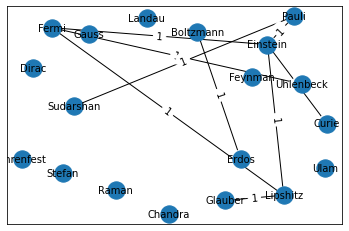

In [ ]:
cocitation_graph = nx.from_numpy_matrix(cocitation_mat, parallel_edges=False, create_using = None)
mapping = dict(zip(cocitation_graph, G))
cocitation_graph = nx.relabel_nodes(cocitation_graph, mapping) 
layout = nx.spring_layout(cocitation_graph, k=1,iterations=10)
nx.draw_networkx(cocitation_graph, layout, font_size=10)
nx.draw_networkx_edge_labels(cocitation_graph,edge_labels=nx.get_edge_attributes(cocitation_graph,'weight'), pos=layout)
plt.show()

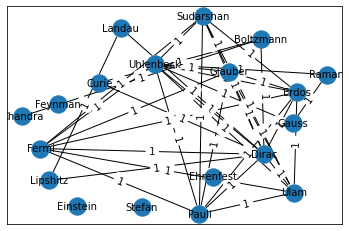

In [ ]:
bibilographic_graph = nx.from_numpy_matrix(bibilographic_mat, parallel_edges=False, create_using = None)
mapping = dict(zip(bibilographic_graph, G))
bibilographic_graph = nx.relabel_nodes(bibilographic_graph, mapping) 
layout = nx.spring_layout(bibilographic_graph, k=1,iterations=10)
nx.draw_networkx(bibilographic_graph, layout,font_size=10)
nx.draw_networkx_edge_labels(bibilographic_graph,edge_labels=nx.get_edge_attributes(bibilographic_graph,'weight'), pos=layout)
plt.show()